In [112]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import math
import matplotlib.ticker as mticker

## I. World Building
### Here we define the route, the fare, and the different kinds of commuters and public transportation

In [39]:
import numpy as np
import random
from datetime import time

route_length = 24
minimum_fare = 13
minimum_distance = 4
additional_charge_per_unit = 1.50
unit = 'kilometer'
hours_to_complete_route = 2

possible_passengers = []
list_of_vehicles = []
company_raw_data = {'vehicle_id': [], 'boarding_time': [], 'boarding_place': [], 'disembarking_time': [], 'disembarking_place': [], 'payment': []}


class MorningPassenger:
    def __init__(self, mean_start_place):
        # Defining when the passenger starts waiting for public transport
        self.mean_start_hour = 7
        self.sigma_start_hour = 1.8
        self.start_hour = -1
        while self.start_hour < 0 or self.start_hour >= 24:
            self.start_hour = int(round(np.random.normal(self.mean_start_hour, self.sigma_start_hour, 1)[0], 0))
        self.start_minute = random.randint(0, 59)
        self.start_second = random.randint(0, 59)
        self.start_time = time(self.start_hour, self.start_minute, self.start_second)

        # Defining where the passenger waits for public transport
        self.mean_start_place = mean_start_place
        self.sigma_start_place = 1.5
        self.start_place = -1
        while self.start_place < 0 or self.start_place >= route_length:
            self.start_place = int(round(np.random.normal(self.mean_start_place, self.sigma_start_place, 1)[0], 0))

        # Defining where the passenger wants to go to
        self.mean_end_place = (route_length + self.start_place) / 2
        self.sigma_end_place = 4
        self.end_place = self.start_place - 1
        while self.end_place <= self.start_place or self.end_place > route_length:
            self.end_place = int(round(np.random.normal(self.mean_end_place, self.sigma_end_place, 1)[0], 0))

        # Defining the fare the passenger will pay
        if self.end_place - self.start_place <= 4:
            self.payment = minimum_fare
        else:
            self.payment = minimum_fare + (self.end_place - self.start_place - minimum_distance) * additional_charge_per_unit

        global possible_passengers
        possible_passengers.append([self.start_time, self.start_place, self.end_place, self.payment])


class NoonPassenger:
    def __init__(self, mean_start_place):
        # Defining when the passenger starts waiting for public transport
        self.mean_start_hour = 12
        self.sigma_start_hour = 1.2
        self.start_hour = -1
        while self.start_hour < 0 or self.start_hour >= 24:
            self.start_hour = int(round(np.random.normal(self.mean_start_hour, self.sigma_start_hour, 1)[0], 0))
        self.start_minute = random.randint(0, 59)
        self.start_second = random.randint(0, 59)
        self.start_time = time(self.start_hour, self.start_minute, self.start_second)
        
        # Defining where the passenger waits for public transport
        self.mean_start_place = mean_start_place
        self.sigma_start_place = 2.5
        self.start_place = -1
        while self.start_place < 0 or self.start_place >= route_length:
            self.start_place = int(round(np.random.normal(self.mean_start_place, self.sigma_start_place, 1)[0], 0))

        # Defining where the passenger wants to go to
        self.mean_end_place = (route_length + self.start_place) / 2
        self.sigma_end_place = 4
        self.end_place = self.start_place - 1
        while self.end_place <= self.start_place or self.end_place > route_length:
            self.end_place = int(round(np.random.normal(self.mean_end_place, self.sigma_end_place, 1)[0], 0))

        # Defining the fare the passenger will pay
        if self.end_place - self.start_place <= 4:
            self.payment = minimum_fare
        else:
            self.payment = minimum_fare + (self.end_place - self.start_place - minimum_distance) * additional_charge_per_unit

        global possible_passengers
        possible_passengers.append([self.start_time, self.start_place, self.end_place, self.payment])


class AfternoonPassenger:
    def __init__(self, mean_start_place):
        # Defining when the passenger starts waiting for public transport
        self.mean_start_hour = 17
        self.sigma_start_hour = 1.8
        self.start_hour = -1
        while self.start_hour < 0 or self.start_hour >= 24:
            self.start_hour = int(round(np.random.normal(self.mean_start_hour, self.sigma_start_hour, 1)[0], 0))
        self.start_minute = random.randint(0, 59)
        self.start_second = random.randint(0, 59)
        self.start_time = time(self.start_hour, self.start_minute, self.start_second)
        
        # Defining where the passenger waits for public transport
        self.mean_start_place = mean_start_place
        self.sigma_start_place = 1.8
        self.start_place = -1
        while self.start_place < 0 or self.start_place >= route_length:
            self.start_place = int(round(np.random.normal(self.mean_start_place, self.sigma_start_place, 1)[0], 0))

        # Defining where the passenger wants to go to
        self.mean_end_place = (route_length + self.start_place) / 2
        self.sigma_end_place = 4
        self.end_place = self.start_place - 1
        while self.end_place <= self.start_place or self.end_place > route_length:
            self.end_place = int(round(np.random.normal(self.mean_end_place, self.sigma_end_place, 1)[0], 0))

        # Defining the fare the passenger will pay
        if self.end_place - self.start_place <= 4:
            self.payment = minimum_fare
        else:
            self.payment = minimum_fare + (self.end_place - self.start_place - minimum_distance) * additional_charge_per_unit

        global possible_passengers
        possible_passengers.append([self.start_time, self.start_place, self.end_place, self.payment])

        
class EveningPassenger:
    def __init__(self, mean_start_place):
        # Defining when the passenger starts waiting for public transport
        self.mean_start_hour = 20
        self.sigma_start_hour = 1.8
        self.start_hour = -1
        while self.start_hour < 0 or self.start_hour >= 24:
            self.start_hour = int(round(np.random.normal(self.mean_start_hour, self.sigma_start_hour, 1)[0], 0))
        self.start_minute = random.randint(0, 59)
        self.start_second = random.randint(0, 59)
        self.start_time = time(self.start_hour, self.start_minute, self.start_second)
        
        # Defining where the passenger waits for public transport
        self.mean_start_place = mean_start_place
        self.sigma_start_place = 2.5
        self.start_place = -1
        while self.start_place < 0 or self.start_place >= route_length:
            self.start_place = int(round(np.random.normal(self.mean_start_place, self.sigma_start_place, 1)[0], 0))

        # Defining where the passenger wants to go to
        self.mean_end_place = (route_length + self.start_place) / 2
        self.sigma_end_place = 4
        self.end_place = self.start_place - 1
        while self.end_place <= self.start_place or self.end_place > route_length:
            self.end_place = int(round(np.random.normal(self.mean_end_place, self.sigma_end_place, 1)[0], 0))

        # Defining the fare the passenger will pay
        if self.end_place - self.start_place <= 4:
            self.payment = minimum_fare
        else:
            self.payment = minimum_fare + (self.end_place - self.start_place - minimum_distance) * additional_charge_per_unit

        global possible_passengers
        possible_passengers.append([self.start_time, self.start_place, self.end_place, self.payment])


class MorningPublicTransportVehicle:
    def __init__(self, number_of_morning_vehicles, vehicle_id):
        # The part about the vehicle's information
        self.vehicle_id = vehicle_id
        self.max_capacity = 20
        self.current_capacity = 0
        self.passengers = []
        self.start_hour = int(5 + ((vehicle_id * (hours_to_complete_route * 3600) / number_of_morning_vehicles) // 3600))
        self.start_minute = int(((vehicle_id * (hours_to_complete_route * 3600) / number_of_morning_vehicles) % 3600) // 60)
        self.start_second = int((vehicle_id * (hours_to_complete_route * 3600) / number_of_morning_vehicles) % 60)
        self.start_time = time(self.start_hour, self.start_minute, self.start_second)

        # The part about the vehicle's schedule
        self.travel_time_per_stop = int(round(hours_to_complete_route * 3600 / route_length, 0))
        self.arrival_time_per_stop = []
        for i in range(route_length):
            self.arrival_time_per_stop.append(
                time(self.start_hour + (self.start_minute + (self.start_second + i * self.travel_time_per_stop) // 60) // 60, 
                (self.start_minute + (self.start_second + i * self.travel_time_per_stop) // 60) % 60, 
                (self.start_second + i * self.travel_time_per_stop) % 60))

        self.extra_arrival_times = []
        self.final_stop_time = time(self.arrival_time_per_stop[0].hour + hours_to_complete_route * 4, self.arrival_time_per_stop[0].minute, self.arrival_time_per_stop[0].second)
        for i in range(1, 4):
            for j in self.arrival_time_per_stop:
                self.extra_arrival_times.append(time(j.hour + i * hours_to_complete_route, j.minute, j.second))
        self.extra_arrival_times.append(self.final_stop_time)
        self.arrival_time_per_stop += self.extra_arrival_times
    
    # The part about how the vehicle loads and unloads passengers
    def stop(self, time):
        global possible_passengers
        global company_raw_data
        if time in self.arrival_time_per_stop:
            # The part where passengers disembark
            disembarking_passengers_index = []
            for iterator in range(len(self.passengers)):
                if (self.passengers[iterator][2] % route_length) == (self.arrival_time_per_stop.index(time) % route_length):
                    disembarking_passengers_index.append(iterator)
                    # We record the passenger's final information as they leave
                    company_raw_data['vehicle_id'].append(self.vehicle_id)
                    company_raw_data['boarding_time'].append(self.passengers[iterator][0])
                    company_raw_data['boarding_place'].append(self.passengers[iterator][1])
                    company_raw_data['disembarking_time'].append(time)
                    company_raw_data['disembarking_place'].append(self.passengers[iterator][2] % route_length)
                    company_raw_data['payment'].append(self.passengers[iterator][3])
            for index in sorted(disembarking_passengers_index, reverse = True):
                del self.passengers[index]
            self.current_capacity -= len(disembarking_passengers_index)

            # The part where passengers board
            i = 0
            boarding_passengers_index = []
            while self.current_capacity < self.max_capacity and i != len(possible_passengers) and time != self.arrival_time_per_stop[-1]:
                if possible_passengers[i][0] <= time and possible_passengers[i][1] == self.arrival_time_per_stop.index(time) % route_length:
                    boarding_passengers_index.append(i)
                    # Passenger's initial record as they board (boarding_time, boarding_place, disembarking_place, payment)
                    self.passengers.append((time, possible_passengers[i][1], possible_passengers[i][2], possible_passengers[i][3]))
                    self.current_capacity += 1
                i += 1
            for index in sorted(boarding_passengers_index, reverse = True):
                del possible_passengers[index]


class AfternoonPublicTransportVehicle:
    # The part about the vehicle's information
    def __init__(self, number_of_afternoon_vehicles, vehicle_id):
        self.vehicle_id = vehicle_id
        self.max_capacity = 20
        self.current_capacity = 0
        self.passengers = []
        self.start_hour = int(12 + ((vehicle_id * (hours_to_complete_route * 3600) / number_of_afternoon_vehicles) // 3600))
        self.start_minute = int(((vehicle_id * (hours_to_complete_route * 3600) / number_of_afternoon_vehicles) % 3600) // 60)
        self.start_second = int((vehicle_id * (hours_to_complete_route * 3600) / number_of_afternoon_vehicles) % 60)
        self.start_time = time(self.start_hour, self.start_minute, self.start_second)

        # The part about the vehicle's schedule
        self.travel_time_per_stop = int(round(hours_to_complete_route * 3600 / route_length, 0))
        self.arrival_time_per_stop = []
        for i in range(route_length):
            self.arrival_time_per_stop.append(
                time(self.start_hour + (self.start_minute + (self.start_second + i * self.travel_time_per_stop) // 60) // 60, 
                (self.start_minute + (self.start_second + i * self.travel_time_per_stop) // 60) % 60, 
                (self.start_second + i * self.travel_time_per_stop) % 60))
            
        self.extra_arrival_times = []
        self.final_stop_time = time(self.arrival_time_per_stop[0].hour + hours_to_complete_route * 4, self.arrival_time_per_stop[0].minute, self.arrival_time_per_stop[0].second)
        for i in range(1, 4):
            for j in self.arrival_time_per_stop:
                self.extra_arrival_times.append(time(j.hour + i * hours_to_complete_route, j.minute, j.second))
        self.extra_arrival_times.append(self.final_stop_time)
        self.arrival_time_per_stop += self.extra_arrival_times

    # The part about how the vehicle loads and unloads passengers
    def stop(self, time):
        global possible_passengers
        global company_raw_data
        if time in self.arrival_time_per_stop:
            # The part where passengers disembark
            disembarking_passengers_index = []
            for iterator in range(len(self.passengers)):
                if (self.passengers[iterator][2] % route_length) == (self.arrival_time_per_stop.index(time) % route_length):
                    disembarking_passengers_index.append(iterator)
                    # We record the passenger's final information as they leave
                    company_raw_data['vehicle_id'].append(self.vehicle_id)
                    company_raw_data['boarding_time'].append(self.passengers[iterator][0])
                    company_raw_data['boarding_place'].append(self.passengers[iterator][1])
                    company_raw_data['disembarking_time'].append(time)
                    company_raw_data['disembarking_place'].append(self.passengers[iterator][2] % route_length)
                    company_raw_data['payment'].append(self.passengers[iterator][3])
            for index in sorted(disembarking_passengers_index, reverse = True):
                del self.passengers[index]
            self.current_capacity -= len(disembarking_passengers_index)

            # The part where passengers board
            i = 0
            boarding_passengers_index = []
            while self.current_capacity < self.max_capacity and i != len(possible_passengers) and time != self.arrival_time_per_stop[-1]:
                if possible_passengers[i][0] <= time and possible_passengers[i][1] == self.arrival_time_per_stop.index(time) % route_length:
                    boarding_passengers_index.append(i)
                    # Passenger's initial record as they board (boarding_time, boarding_place, disembarking_place, payment)
                    self.passengers.append((time, possible_passengers[i][1], possible_passengers[i][2], possible_passengers[i][3]))
                    self.current_capacity += 1
                i += 1
            for index in sorted(boarding_passengers_index, reverse = True):
                del possible_passengers[index]





## II. Creating the set of possible passengers and public transport vehicles
* Students and workers commute early. Therefore, there are a lot of passengers in the morning.
* It is hot at noon. There is a reduction in passenger volume.
* Students and workers return to their homes and other people go out to in the afternoon. This results in the busiest time of the day.
* The remaining people outside start going home in the evening.
* There are 32 public transport vehicles in the morning to start with
* There are 38 public transport vehicles in the afternoon

In [132]:
# possible_passengers = []

In [40]:
# Morning passengers
for i in range(2000):
    person = MorningPassenger(2)
for i in range(1750):
    person = MorningPassenger(12)
for i in range(1500):
    person = MorningPassenger(2)
for i in range(1000):
    person = MorningPassenger(20)

In [41]:
# Noon passengers
for i in range(1250):
    person = NoonPassenger(3)
for i in range(1250):
    person = NoonPassenger(13)
for i in range(750):
    person = NoonPassenger(7)
for i in range(500):
    person = NoonPassenger(19)

In [42]:
# Afternoon passengers
for i in range(2250):
    person = AfternoonPassenger(3)
for i in range(2250):
    person = AfternoonPassenger(18)
for i in range(2000):
    person = AfternoonPassenger(3)
for i in range(2000):
    person = AfternoonPassenger(28)

In [43]:
# Evening passengers
for i in range(500):
    person = EveningPassenger(2)
for i in range(1525):
    person = EveningPassenger(12)
for i in range(1500):
    person = EveningPassenger(6)
for i in range(1000):
    person = EveningPassenger(18)

In [44]:
# Sorting the passengers by the time they arrived
possible_passengers.sort()

In [9]:
# list_of_vehicles = []
# company_raw_data = {'vehicle_id': [], 'boarding_time': [], 'boarding_place': [], 'disembarking_time': [],'disembarking_place': [], 'payment': []}
# possible_passengers = []

In [45]:
# Public transport for morning to noon
for i in range(32):
    bus = MorningPublicTransportVehicle(32, i)
    list_of_vehicles.append(bus)

# Public transport for afternoon to evening
for i in range(38):
    bus = AfternoonPublicTransportVehicle(38, 32 + i)
    list_of_vehicles.append(bus)

## III. Simulating the public transport vehicles boarding and unboarding passengers

In [46]:
for hour in range(5, 22):
    for minute in range(60):
        for second in range(60):
            for vehicle in list_of_vehicles:
                vehicle.stop(time(hour, minute, second))

## IV. Displaying the simulated data we will be analyzing
### This sample data is sure to be possible. Here, there is no chance of public transport vehicles exceeding their max capacity unlike in simple randomly generated sample data.

In [47]:
df = pd.DataFrame(company_raw_data).sort_values(['boarding_time', 'vehicle_id'])
df

,vehicle_id,boarding_time,boarding_place,disembarking_time,disembarking_place,payment
0,0,05:00:00,0,05:20:00,4,13.0
3,0,05:00:00,0,05:30:00,6,16.0
5,0,05:00:00,0,05:35:00,7,17.5
10,0,05:00:00,0,05:40:00,8,19.0
14,0,05:00:00,0,05:45:00,9,20.5
...,...,...,...,...,...,...
17615,45,21:52:06,18,21:57:06,19,13.0
17623,42,21:52:37,20,21:57:37,21,13.0
17624,42,21:52:37,20,21:57:37,21,13.0
17653,44,21:53:56,19,21:58:56,20,13.0


## V. Infering the needed information from the sample data

In [48]:
# How many people board which vehicle, which place, and what time
board = pd.DataFrame(df[['vehicle_id', 'boarding_time', 'boarding_place']].value_counts()).sort_values('boarding_time')
board.reset_index(inplace = True)
board['board_count'] = board[0]
board.drop(0, axis = 1, inplace = True)
board

,vehicle_id,boarding_time,boarding_place,board_count
0,0,05:00:00,0,20
1,1,05:03:45,0,20
2,2,05:07:30,0,9
3,3,05:11:15,0,1
4,2,05:12:30,1,11
...,...,...,...,...
4653,37,21:51:50,23,10
4654,45,21:52:06,18,1
4655,42,21:52:37,20,2
4656,44,21:53:56,19,1


In [49]:
# How many people get off which vehicle, which place, and what time
disembark = pd.DataFrame(df[['vehicle_id', 'disembarking_time', 'disembarking_place']].value_counts()).sort_values('disembarking_time')
disembark.reset_index(inplace = True)
disembark['disembark_count'] = disembark[0]
disembark.drop(0, axis = 1, inplace = True)
disembark

,vehicle_id,disembarking_time,disembarking_place,disembark_count
0,0,05:20:00,4,1
1,1,05:23:45,4,1
2,3,05:26:15,3,1
3,0,05:30:00,6,1
4,1,05:33:45,6,1
...,...,...,...,...
4554,63,21:58:56,8,1
4555,52,21:59:12,15,1
4556,41,21:59:28,22,4
4557,60,21:59:28,10,2


In [50]:
derivative = pd.merge(board, disembark, left_on = ['vehicle_id', 'boarding_time', 'boarding_place'], right_on = ['vehicle_id', 'disembarking_time', 'disembarking_place'], how = 'outer')

# Turns null board_count and disembark_count to zero
derivative['board_count'].fillna(0, inplace = True)
derivative['disembark_count'].fillna(0, inplace = True)
derivative['board_count'] = derivative['board_count'].apply((lambda x: int(x)))
derivative['disembark_count'] = derivative['disembark_count'].apply((lambda x: int(x)))

# Combines boarding and disembarking place
derivative.loc[pd.isna(derivative['disembarking_place']), 'disembarking_place'] = derivative['boarding_place']
derivative['place'] = derivative['disembarking_place'].apply((lambda x: int(x)))
derivative.drop(columns = ['boarding_place', 'disembarking_place'], inplace = True)

# Combines boarding and disembarking time
derivative.loc[pd.isna(derivative['disembarking_time']), 'disembarking_time'] = derivative['boarding_time']
derivative['time'] = derivative['disembarking_time']
derivative.drop(columns = ['boarding_time', 'disembarking_time'], inplace = True)
derivative.sort_values('time', inplace = True)

# Add a column for the time's hour part
derivative['boarding_hour'] = derivative['time'].apply(lambda x: x.hour)

# Calculates the change in the number of passenger
derivative['change_in_count'] = derivative['board_count'] - derivative['disembark_count']
derivative.drop(columns = ['board_count', 'disembark_count'], inplace = True)

# derivative = derivative[['vehicle_id', ]]
derivative

,vehicle_id,place,time,boarding_hour,change_in_count
0,0,0,05:00:00,5,20
1,1,0,05:03:45,5,20
2,2,0,05:07:30,5,9
3,3,0,05:11:15,5,1
4,2,1,05:12:30,5,11
...,...,...,...,...,...
5129,63,8,21:58:56,21,-1
5130,52,15,21:59:12,21,-1
5132,60,10,21:59:28,21,-2
5131,41,22,21:59:28,21,-4


In [78]:
# Separating the records by vehicles
record_by_vehicle = {vehicle_id: derivative[derivative['vehicle_id'] == vehicle_id] for vehicle_id in list(derivative['vehicle_id'].unique())}

# Calculating how many passengers each vehicle has at every stop they make
for key, value in record_by_vehicle.items():
    value_copy = value.copy()
    value_copy['current_passengers'] = value_copy['change_in_count'].cumsum()
    value_copy['current_capacity_percentage'] = value_copy['current_passengers'] / 20
    record_by_vehicle[key] = value_copy

In [82]:
# If a vehicle makes a stop but no passenger boards or disembarks, then no record will be added. This can mislead us in the average capacity percentage of the vehicles per time and place.
# If a vehicle makes a stop but no passenger boards or disembarks, then we just have to record its previous capacity percentage as the current one
record_by_vehicle_copy = copy.deepcopy(record_by_vehicle)

for dataframe in record_by_vehicle_copy.values():
    #Resetting the indeces
    dataframe.reset_index(inplace = True)
    dataframe.drop('index', axis = 1, inplace = True)
    new_col_val = []

    # Fixing all but the last line of record
    for i in range(len(dataframe) - 1):
        if dataframe['place'].iloc[i] < dataframe['place'].iloc[i + 1]:
            new_col_val.append([place_number for place_number in range(dataframe['place'].iloc[i], dataframe['place'].iloc[i + 1])])
        else:
            to_add = [place_number for place_number in range(dataframe['place'].iloc[i], route_length)]
            if dataframe['place'].iloc[i + 1] == 0:
                pass
            else:
                for place_number in range(0, dataframe['place'].iloc[i + 1]):
                    to_add.append(place_number)
            new_col_val.append(to_add)

    # Fixing the last line of record
    if dataframe['place'].iloc[-1] == 0:
        dataframe.drop(len(dataframe) - 1, axis = 0, inplace = True)
    else:
        new_col_val.append([place_number for place_number in range(dataframe['place'].iloc[-1], route_length)])

    dataframe['list_of_place'] = new_col_val

In [84]:
record_by_vehicle_copy[30]

,vehicle_id,place,time,boarding_hour,change_in_count,current_passengers,current_capacity_percentage,list_of_place
0,30,0,06:52:30,6,6,6,0.30,[0]
1,30,1,06:57:30,6,14,20,1.00,"[1, 2]"
2,30,3,07:07:30,7,0,20,1.00,"[3, 4, 5]"
3,30,6,07:22:30,7,0,20,1.00,"[6, 7]"
4,30,8,07:32:30,7,-2,18,0.90,[8]
...,...,...,...,...,...,...,...,...
74,30,19,14:27:30,14,0,20,1.00,[19]
75,30,20,14:32:30,14,-2,18,0.90,[20]
76,30,21,14:37:30,14,-5,13,0.65,[21]
77,30,22,14:42:30,14,-1,12,0.60,[22]


In [85]:
cleaned_df = pd.concat([dataframe for dataframe in record_by_vehicle_copy.values()], ignore_index = True)
cleaned_df

,vehicle_id,place,time,boarding_hour,change_in_count,current_passengers,current_capacity_percentage,list_of_place
0,0,0,05:00:00,5,20,20,1.00,"[0, 1, 2, 3]"
1,0,4,05:20:00,5,0,20,1.00,"[4, 5]"
2,0,6,05:30:00,5,0,20,1.00,[6]
3,0,7,05:35:00,5,0,20,1.00,[7]
4,0,8,05:40:00,5,0,20,1.00,[8]
...,...,...,...,...,...,...,...,...
5087,68,19,21:09:44,21,0,20,1.00,[19]
5088,68,20,21:14:44,21,-1,19,0.95,[20]
5089,68,21,21:19:44,21,-4,15,0.75,[21]
5090,68,22,21:24:44,21,-7,8,0.40,[22]


In [90]:
cleaned_df = cleaned_df.explode('list_of_place')
cleaned_df

,vehicle_id,place,time,boarding_hour,change_in_count,current_passengers,current_capacity_percentage,list_of_place
0,0,0,05:00:00,5,20,20,1.00,0
0,0,0,05:00:00,5,20,20,1.00,1
0,0,0,05:00:00,5,20,20,1.00,2
0,0,0,05:00:00,5,20,20,1.00,3
1,0,4,05:20:00,5,0,20,1.00,4
...,...,...,...,...,...,...,...,...
5087,68,19,21:09:44,21,0,20,1.00,19
5088,68,20,21:14:44,21,-1,19,0.95,20
5089,68,21,21:19:44,21,-4,15,0.75,21
5090,68,22,21:24:44,21,-7,8,0.40,22


In [103]:
capacity_per_place_time = cleaned_df.pivot_table(
    values = 'current_capacity_percentage',
    index = 'boarding_hour',
    columns = 'list_of_place',
    aggfunc = 'mean',
    fill_value = 0
)

In [104]:
capacity_per_place_time

list_of_place,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
boarding_hour,,,,,,,,,,,,,,,,,,,,,
5,0.290625,0.940000,1.000000,1.000000,1.000000,1.000,1.000000,0.977778,0.975000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.312500,0.950000,1.000000,1.000000,1.000000,1.000,1.000000,0.975000,0.916667,0.903125,...,1.000000,1.000000,0.918182,0.875000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
7,0.396875,1.000000,1.000000,1.000000,1.000000,1.000,1.000000,0.961111,0.947059,0.885294,...,1.000000,0.973529,0.834375,0.728125,0.709375,1.000000,1.000000,1.000000,0.934375,0.559375
8,0.325000,1.000000,1.000000,1.000000,1.000000,1.000,1.000000,0.973077,0.953333,0.956667,...,1.000000,0.916667,0.775000,0.662500,0.590625,0.728125,1.000000,1.000000,0.781250,0.415625
9,0.225000,0.706250,1.000000,1.000000,1.000000,1.000,1.000000,0.957895,0.933333,0.921875,...,1.000000,0.884375,0.725000,0.634375,0.537500,0.531250,0.840625,0.862500,0.650000,0.303125
10,0.150000,0.418750,1.000000,1.000000,1.000000,1.000,1.000000,1.000000,0.976471,0.959375,...,1.000000,0.912500,0.834375,0.737500,0.684375,0.615625,0.550000,0.478125,0.343750,0.165625
11,0.134375,0.343750,1.000000,1.000000,1.000000,1.000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.909375,0.887500,0.887500,0.812500,0.768750,0.643750,0.487500,0.321875,0.162500
12,0.156250,0.375000,1.000000,1.000000,1.000000,1.000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.965625,0.923529,0.890625,0.906250,0.837500,0.728125,0.650000,0.481250,0.246875
13,0.410000,0.883333,1.000000,1.000000,1.000000,1.000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.978125,0.890625,0.821875,0.703125,0.540625,0.421875,0.353125


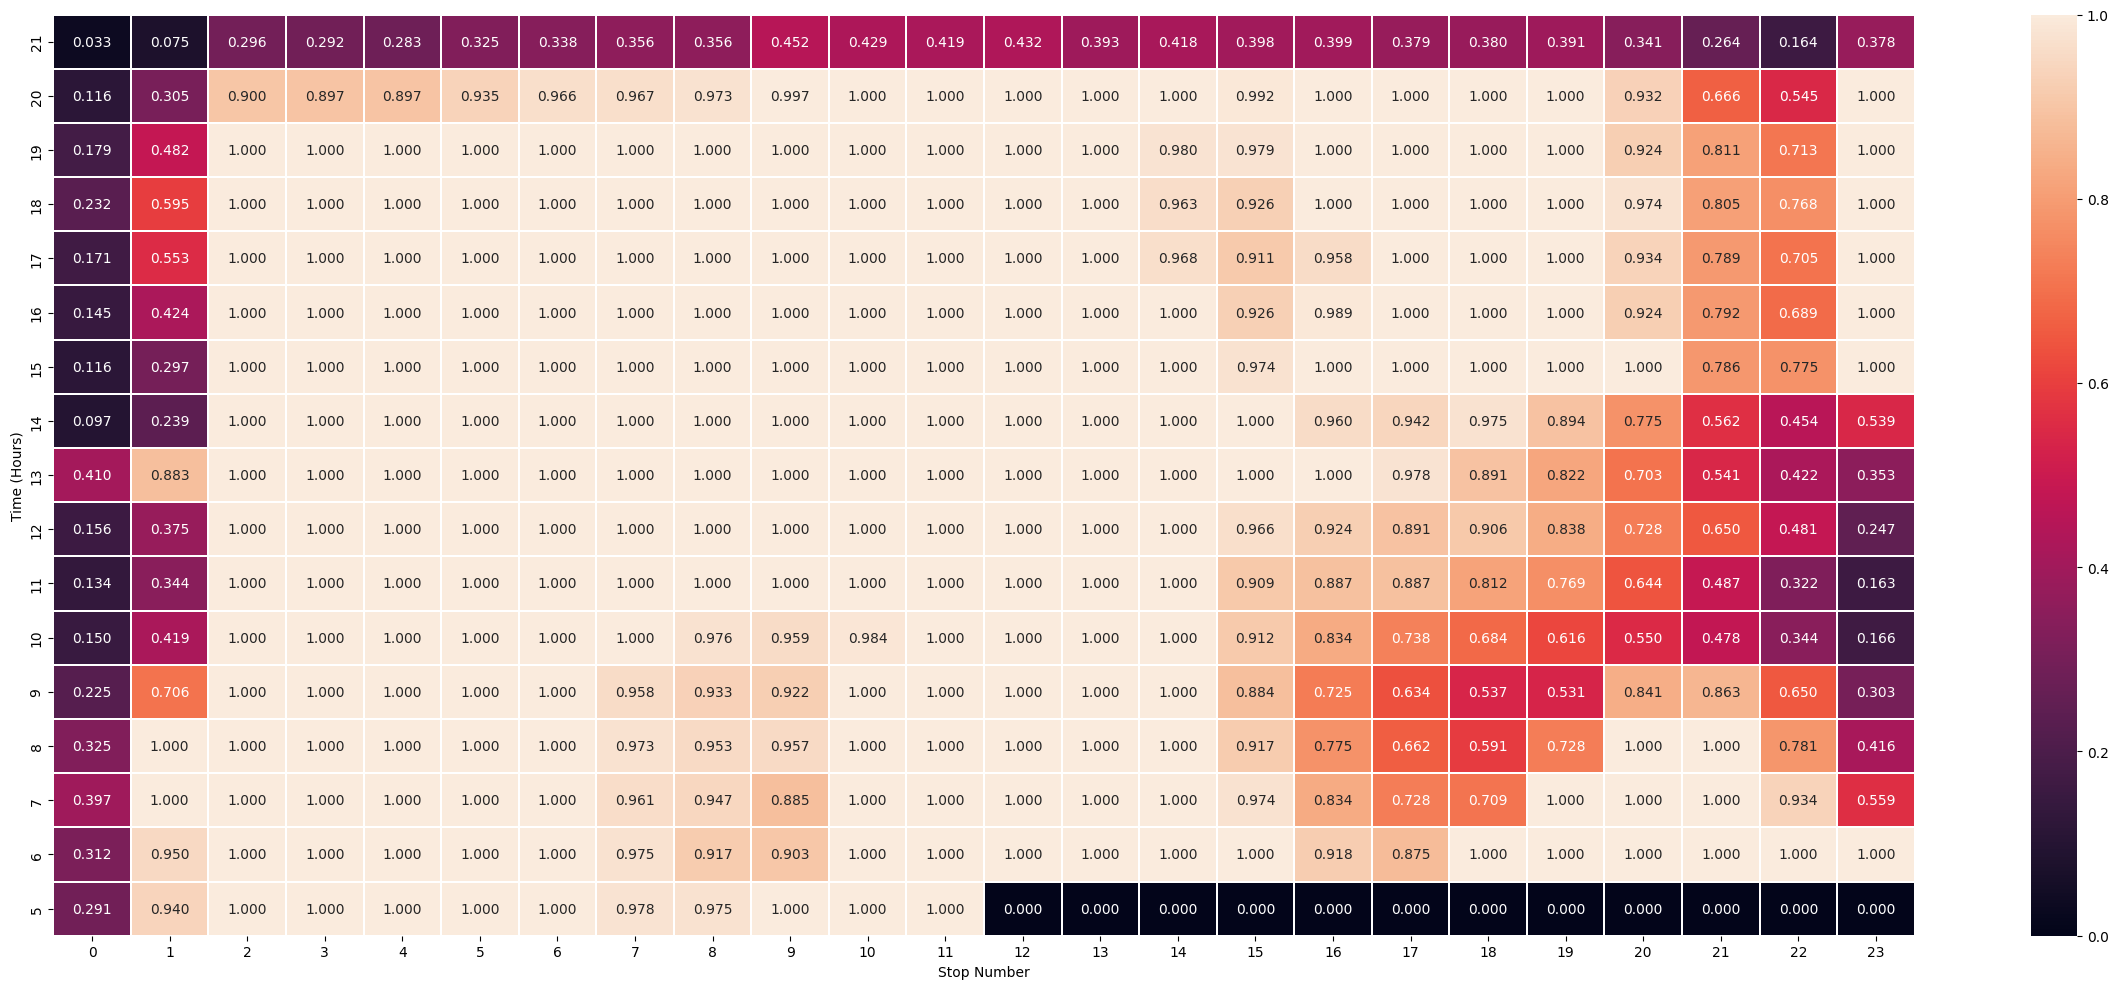

In [105]:
# Visualizing the income_distribution
fig, ax = plt.subplots(figsize=(24, 10))
sns.heatmap(capacity_per_place_time, annot = True, fmt = '1.3f', linewidths = 0.1, ax = ax, robust = True)
plt.xlabel('Stop Number')
plt.ylabel('Time (Hours)')
# plt.text(13, 25, f'Gross Income per {distance_unit}-Hour', fontsize = 25)
ax.invert_yaxis()
fig.tight_layout()

In [117]:
morning_schedule = cleaned_df[cleaned_df['vehicle_id'] < 32]
afternoon_schedule = cleaned_df[(cleaned_df['vehicle_id'] > 31)]

morning_schedule_average = morning_schedule['current_capacity_percentage'].mean()
afternoon_schedule_average = afternoon_schedule['current_capacity_percentage'].mean()

average_capacity = {
    'Schedule': ['Morning', 'Afternoon'],
    'Average Capacity': [morning_schedule_average, afternoon_schedule_average]
}
average_capacity =pd.DataFrame(average_capacity)

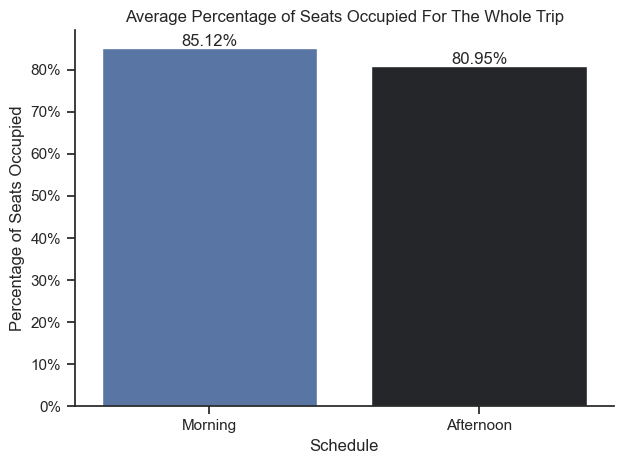

In [123]:
sns.set_theme(style = 'ticks')
sns.barplot(data = average_capacity, x = 'Schedule', y = 'Average Capacity', hue = 'Average Capacity', palette = 'dark:b', legend = False)
sns.despine()
plt.xlabel('Schedule')
plt.ylabel('Percentage of Seats Occupied')
plt.title('Average Percentage of Seats Occupied For The Whole Trip')
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter(1))

for i, value in enumerate(average_capacity['Average Capacity'].values.tolist()):
    plt.text(i, value + 0.005, f'{round(value * 100, 2)}%', ha = 'center')

plt.tight_layout()